In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [174]:
#it is making me do low_memory = False
bottle_df = pd.read_csv("bottle.csv", low_memory = False)
bottle_df.head()



,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
cast_df = pd.read_csv("cast.csv", low_memory=False)
cast_df.head()
cast_df

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

Types of preprocessing gone over in class: 
    1.clean up null values
    2. data cleaning (dashes, odd characters, etc. Handle missing data, remove extreme outliers)
    3. one hot encoding
    4. convert categorical values to numerical
    5. standardization/normalization
    6. deal with multicolinearity

In [176]:
print(cast_df.columns)
print(cast_df.dtypes)
cast_df.info()


Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')
Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     fl

Dropping columns that have more null values than filled in values, redundant ones,  and ones that just makes no sense to be in there. 


In [177]:

cast_df.drop(['Cst_Cnt', 'Cruise_ID', 'Orig_Sta_ID', 'Cruz_Sta', 'Sta_ID', 'Date', 'Time', 'Julian_Date', 'Julian_Day','Distance', 'Julian_Date', 'Bottom_D', 'Secchi','ForelU', 'Ship_Name', 'Order_Occ',  'Cruz_Leg', 'Data_Or','IntChl','IntC14','Inc_Str','Inc_End','PST_LAN',
              'Civil_T', 'TimeZone', 'Wave_Dir', 'Wave_Ht','Wave_Prd', 'Barometer','Dry_T','Wet_T', 'Wea','Cloud_Typ',
              'Visibility', 'Cloud_Amt', 'Cast_ID', 'Lat_Deg', 'Lat_Min', 'Lat_Hem', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line', 'St_Line', 'Rpt_Sta', 'St_Station', 'Ship_Code', 'Cruz_Num'],axis=1,inplace=True)

 

In [178]:
cast_df
cast_df.isnull().sum()

Cruise          0
DbSta_ID        0
Quarter         0
Sta_Code        0
Year            0
Month           0
Lat_Dec         0
Lon_Dec         0
Ac_Line         0
Ac_Sta          0
Data_Type       0
Event_Num       3
Wind_Dir     1476
Wind_Spd     1679
dtype: int64

In [179]:
#just getting rid of anything that will be problematic, just like real life. 
cast_df=cast_df.dropna()
cast_df.isnull().sum()

Cruise       0
DbSta_ID     0
Quarter      0
Sta_Code     0
Year         0
Month        0
Lat_Dec      0
Lon_Dec      0
Ac_Line      0
Ac_Sta       0
Data_Type    0
Event_Num    0
Wind_Dir     0
Wind_Spd     0
dtype: int64

Cruise       0
DbSta_ID     0
Quarter      0
Sta_Code     0
Year         0
Month        0
Lat_Dec      0
Lon_Dec      0
Ac_Line      0
Ac_Sta       0
Data_Type    0
Event_Num    3
dtype: int64

Cst_Cnt        0
Cruise_ID      0
Cruise         0
Cruz_Sta       0
DbSta_ID       0
Sta_ID         0
Quarter        0
Sta_Code       0
Date           0
Year           0
Month          0
Julian_Date    0
Julian_Day     0
Lat_Dec        0
Lat_Deg        0
Lat_Min        0
Lat_Hem        0
Lon_Dec        0
Lon_Deg        0
Lon_Min        0
Lon_Hem        0
Rpt_Line       0
St_Line        0
Ac_Line        0
Rpt_Sta        0
St_Station     0
Ac_Sta         0
Ship_Code      0
Data_Type      0
Event_Num      0
Orig_Sta_ID    0
Cruz_Num       0
dtype: int64

In [180]:
cast_df.head()

,Cruise,DbSta_ID,Quarter,Sta_Code,Year,Month,Lat_Dec,Lon_Dec,Ac_Line,Ac_Sta,Data_Type,Event_Num,Wind_Dir,Wind_Spd
0,194903,5400560,1,NST,1949,3,38.833333,-124.083333,53.8,55.8,HY,1.0,23.0,18.0
1,194903,5200750,1,NST,1949,3,38.583333,-125.800000,51.5,75.1,HY,2.0,16.0,5.0
2,194903,5100850,1,NST,1949,3,38.475000,-126.666666,50.3,84.7,HY,3.0,23.0,5.0
3,194903,5000950,1,NST,1949,3,38.333333,-127.516666,49.2,94.3,HY,4.0,18.0,8.0
4,194903,5001040,1,NST,1949,3,38.233333,-128.366666,48.0,103.7,HY,5.0,27.0,13.0


One hot encode



In [181]:
hot_cast_df = pd.get_dummies(cast_df[['Data_Type','Sta_Code']])
hot_cast_df

,Data_Type_10,Data_Type_CT,Data_Type_HY,Data_Type_MX,Data_Type_PR,Sta_Code_IMX,Sta_Code_MBR,Sta_Code_NRO,Sta_Code_NST,Sta_Code_OCO,Sta_Code_SCO,Sta_Code_ST
0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34399,0,0,0,1,0,0,0,0,0,0,0,1
34400,0,0,0,1,0,0,0,0,0,0,0,1
34401,0,0,0,1,0,0,0,0,0,0,0,1
34402,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
print(bottle_df.columns)
print(bottle_df.dtypes)

Take care of null values and getting rid of irrelevant or redundant columns

In [ ]:
dropped_bottle_df = bottle_df.drop([ 'Cst_Cnt', 'Btl_Cnt','BtlNum','R_NO2','R_NO3', 'R_PO4', 
                                'T_qual', 'S_qual', 'SThtaq', 'NH3uM', 'C14As1', 'C14A1p', 'C14As2', 'C14A2p', 
                                'DarkAs', 'DarkAp', 'MeanAs', 'MeanAp', 'IncTim', 'LightP', 'R_NH4', 'R_SAMP', 
                                 'O_qual', 'O2Satq', 'ChlorA', 'R_CHLA', 'R_PHAEO', 'Phaeop', 'PO4uM', 'PO4q', 
                                'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 
                                'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3',  
                                'R_Depth', 'R_PRES',  'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment',], axis=1)

In [ ]:
dropped_bottle_df.isnull().sum()

In [ ]:
#get rid of everything I can't figure out
new_bottle_df=dropped_bottle_df.dropna()
new_bottle_df.isnull().sum()


Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

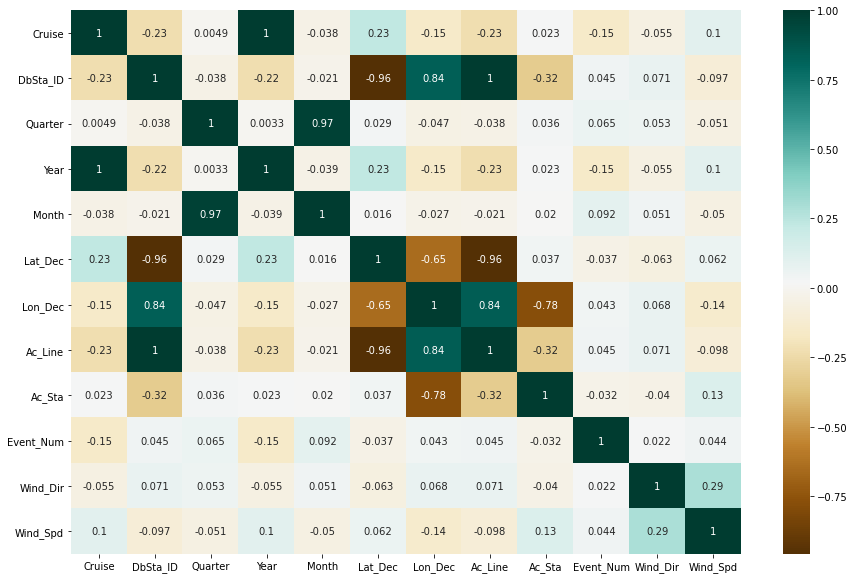

,Cruise,DbSta_ID,Quarter,Sta_Code,Year,Month,Lat_Dec,Lon_Dec,Ac_Line,Ac_Sta,Data_Type,Event_Num,Wind_Dir,Wind_Spd
0,194903,5400560,1,NST,1949,3,38.833333,-124.083333,53.8,55.8,HY,1.0,23.0,18.0
1,194903,5200750,1,NST,1949,3,38.583333,-125.800000,51.5,75.1,HY,2.0,16.0,5.0
2,194903,5100850,1,NST,1949,3,38.475000,-126.666666,50.3,84.7,HY,3.0,23.0,5.0
3,194903,5000950,1,NST,1949,3,38.333333,-127.516666,49.2,94.3,HY,4.0,18.0,8.0
4,194903,5001040,1,NST,1949,3,38.233333,-128.366666,48.0,103.7,HY,5.0,27.0,13.0


In [244]:
cast_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(cast_df.corr(),cmap='BrBG', annot=True)
plt.show()
cast_df.columns
cast_df.head()

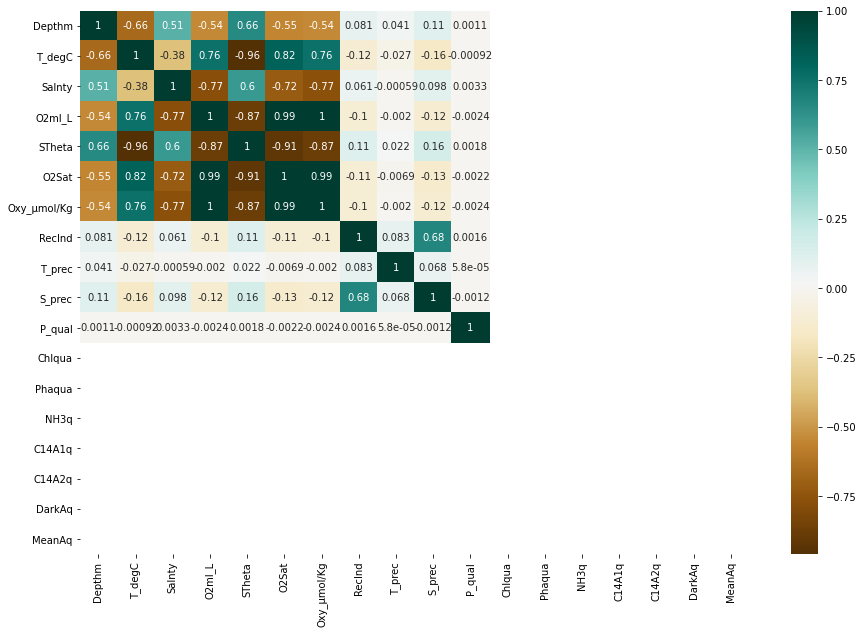

In [245]:
new_bottle_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(new_bottle_df.corr(),cmap='BrBG', annot=True)
plt.show()

In [ ]:
new_bottle_df.corr()

3.  linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [239]:
lin_bot_df = new_bottle_df[['Salnty', 'T_degC']]

X = np.array(lin_bot_df['Salnty']).reshape(-1,1)
y=np.array(lin_bot_df['T_degC']).reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)


regression_df = LinearRegression()
regression_df.fit(X_train, y_train)
y_predict = regression_df.predict(X_test)
accuracy_score = regression_df.score(X_test, y_test)


accuracy_score



0.14218737694377626

4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 

In [240]:
r2_score(y_test, y_predict)

0.14218737694377626

In [241]:
mean_squared_error(y_test,y_predict)


17.27289667812253


5.    Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.



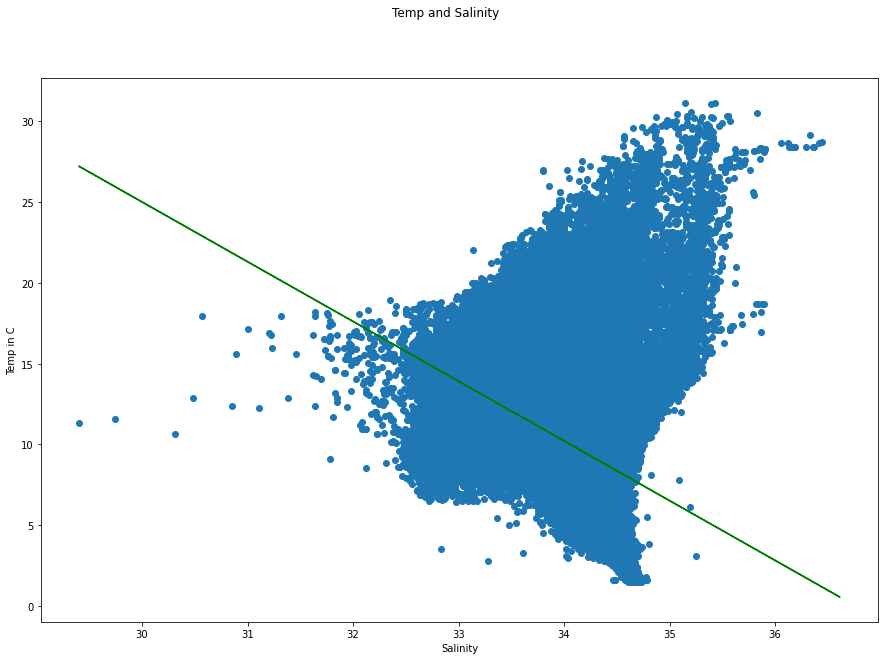

In [242]:

plt.figure(figsize=(15,10))
plt.scatter(x=X_train, y=y_train)
plt.plot(X_test,y_predict,color='green')
plt.suptitle('Temp and Salinity')
plt.xlabel("Salinity")
plt.ylabel("Temp in C")
plt.show()

6. Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/


Polynomial regression captures the relationship between two variables when their relationship isn't linear. It uses the relationship hto find the best way to draw a line through the points


7. Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [234]:
bottle_poly = PolynomialFeatures(degree=2)


X_poly = bottle_poly.fit_transform(X_train)
bottle_poly.fit(X_train, y_train)

model = LinearRegression()


model.fit(X_poly, y_train)

y_predicted = model.predict(bottle_poly.fit_transform(X_test))
model.score((bottle_poly.fit_transform(X_test)), y_test)





0.1753920123986551

In [229]:
bottle_poly = PolynomialFeatures(degree=2) 
poly_data = bottle_poly.fit_transform(X_test)
poly_data


array([[1.00000000e+00, 3.45600000e+01, 1.19439360e+03],
       [1.00000000e+00, 3.39350000e+01, 1.15158423e+03],
       [1.00000000e+00, 3.35400000e+01, 1.12493160e+03],
       ...,
       [1.00000000e+00, 3.42150000e+01, 1.17066623e+03],
       [1.00000000e+00, 3.36970000e+01, 1.13548781e+03],
       [1.00000000e+00, 3.39300000e+01, 1.15124490e+03]])

8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

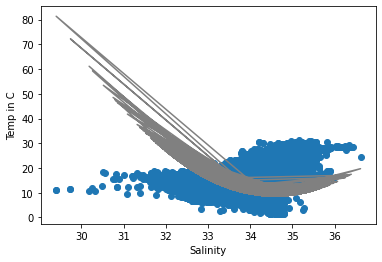

In [238]:
#this can't possibly be right
plt.scatter(X, y)
plt.plot(X_test, y_predicted, color='grey')
plt.xlabel("Salinity")
plt.ylabel("Temp in C")
plt.show()